<a href="https://colab.research.google.com/github/mulkihakim/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. import folder yang ada di Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

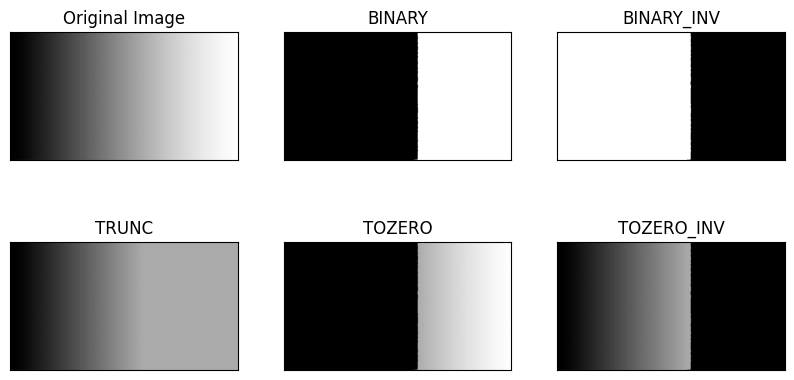

In [4]:
img = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/gradient.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,170,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,170,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,170,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,170,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,170,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

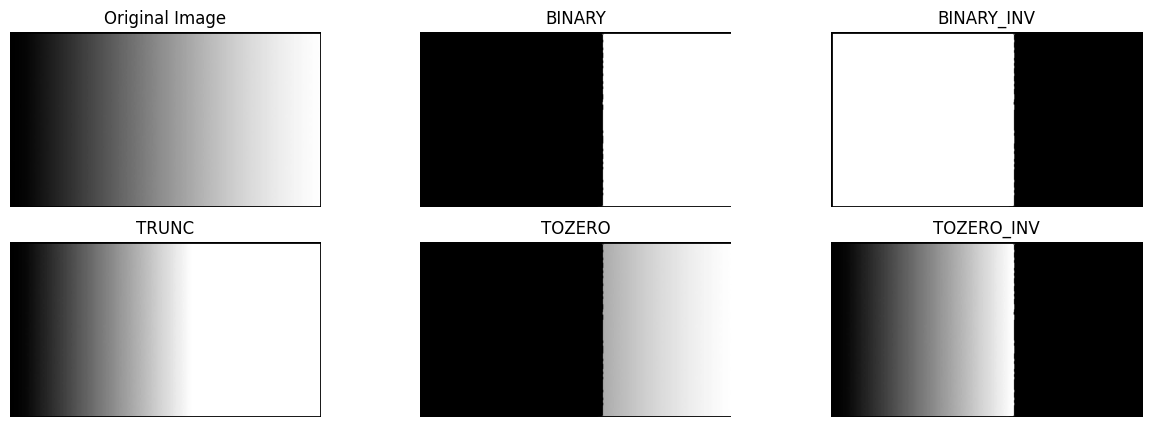

In [5]:
import matplotlib.patches as patches

# 3 (Global Threshold)
image = []

for i in range(6):
  image.append(cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/gradient.jpg', 0))

threshold = 170

title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

# Binary Threshold dan Inverted
maxVal = 0
for x in range (image[1].shape[0]):
  for y in range (image[1].shape[1]):
    if(image[1][x,y] > maxVal):
      maxVal = image[1][x,y]

for x in range (image[1].shape[0]):
  for y in range (image[1].shape[1]):
    if(image[1][x,y] > threshold):
      image[1][x,y] = maxVal
      image[2][x,y] = 0
    else:
      image[1][x,y] = 0
      image[2][x,y] = maxVal

# Truncate Threshold
for x in range (image[3].shape[0]):
  for y in range (image[3].shape[1]):
    if(image[3][x,y] > threshold):
      image[3][x,y] = threshold

# Threshold To Zero dan Inverted
for x in range (image[4].shape[0]):
  for y in range (image[4].shape[1]):
    if(image[4][x,y] > threshold):
      image[5][x,y] = 0
    else:
      image[4][x,y] = 0

# Menampilkan Plot
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
idx = 0
for i in range(2):
  for j in range(3):
    axes[i, j].imshow(image[idx], cmap='gray')
    axes[i, j].axis('off')
    axes[i, j].set_title(title[idx])
    rect = patches.Rectangle((0, 0), image[idx].shape[1], image[idx].shape[0], linewidth=2, edgecolor='black', facecolor='none')
    axes[i, j].add_patch(rect)
    idx += 1

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

Otsu’s threshold value: 185


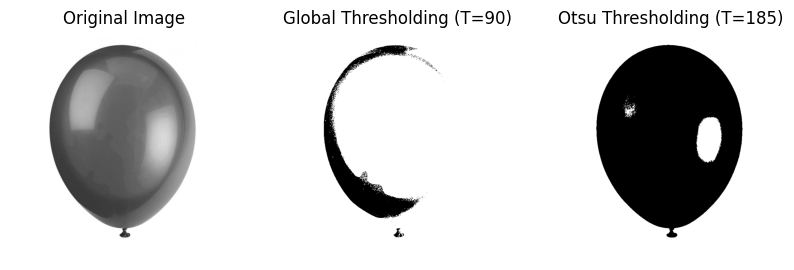

In [6]:
image = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/balloon.jpg', cv.IMREAD_GRAYSCALE)

# Fungsi untuk menghitung histogram dari citra grayscale
def calculate_histogram(image):
    histogram = np.zeros(256)
    for pixel in image.ravel():
        histogram[pixel] += 1
    return histogram

# Fungsi untuk menghitung Otsu Threshold
def otsu_threshold(image):
    histogram = calculate_histogram(image)
    total_pixels = image.size
    sum_total = np.dot(np.arange(256), histogram)

    sum_b, w_b, w_f, max_var_between_classes, threshold = 0, 0, 0, 0, 0

    for i in range(256):
        w_b += histogram[i]
        if w_b == 0:
            continue

        w_f = total_pixels - w_b
        if w_f == 0:
            break

        sum_b += i * histogram[i]
        mean_b = sum_b / w_b
        mean_f = (sum_total - sum_b) / w_f

        # Variasi antar kelas (inter-class variance)
        var_between_classes = w_b * w_f * (mean_b - mean_f) ** 2

        if var_between_classes > max_var_between_classes:
            max_var_between_classes = var_between_classes
            threshold = i

    return threshold

# Fungsi untuk melakukan thresholding global
def global_threshold(image, threshold_value):
    binary_image = np.where(image > threshold_value, 255, 0)
    return binary_image.astype(np.uint8)

# Global Thresholding dengan threshold sembarang
global_thresh_value = 90
global_image = global_threshold(image, global_thresh_value)

# Otsu Thresholding
otsu_thresh_value = otsu_threshold(image)
print(f'Otsu’s threshold value: {otsu_thresh_value}')
otsu_image = global_threshold(image, otsu_thresh_value)

# Menampilkan hasil
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(global_image, cmap='gray')
axs[1].set_title(f'Global Thresholding (T={global_thresh_value})')
axs[1].axis('off')

axs[2].imshow(otsu_image, cmap='gray')
axs[2].set_title(f'Otsu Thresholding (T={otsu_thresh_value})')
axs[2].axis('off')

plt.show()


5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:

  a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.
  
  b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
  
  c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

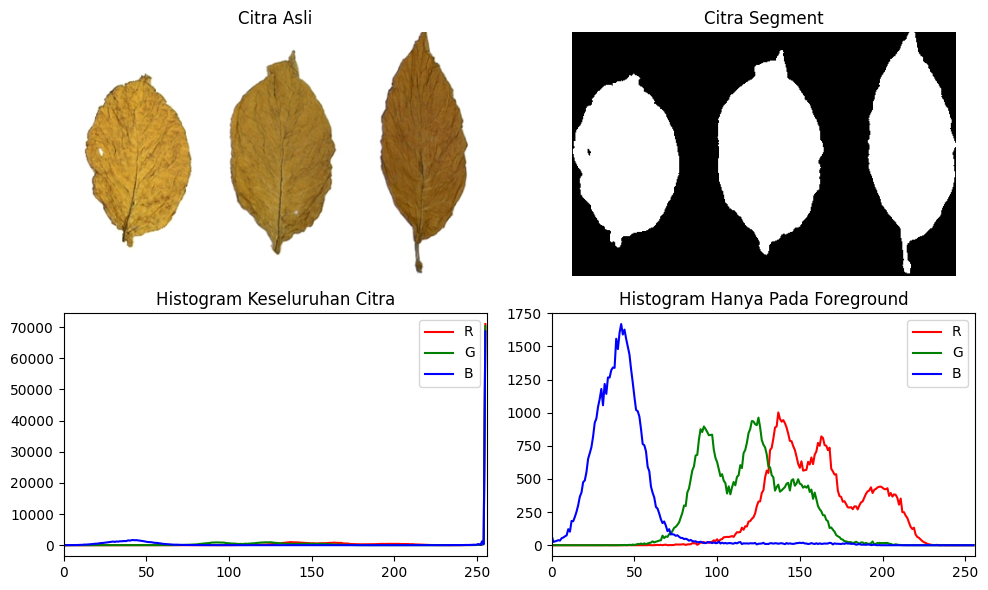

In [11]:
# 5 (Segmentasi dan Masking Citra)

# Inisialisasi citra
image = []
for i in range(2):
  image.append(cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/tobacco.jpg'))
  image[i] = cv.cvtColor(image[i], cv.COLOR_BGR2RGB)

# Definisikan judul
title = ['Citra Asli', 'Citra Segment', 'Histogram Keseluruhan Citra', 'Histogram Hanya Pada Foreground']

# Convert to grayscale and apply thresholding for segmentation
image[1] = cv.cvtColor(image[0], cv.COLOR_BGR2GRAY)
_, thresholded = cv.threshold(image[1], 200, 255, cv.THRESH_BINARY_INV)

# Create mask for foreground
image[1] = np.zeros(image[1].shape, dtype=np.uint8)
image[1][thresholded == 255] = 255

# Hitung histogram untuk keseluruhan citra dan citra yang disegmentasi
hist_full = []
for i in range(3):
  hist_full.append(cv.calcHist([image[0]], [i], None, [256], [0, 256]))

hist_segmented = []
for i in range(3):
  hist_segmented.append(cv.calcHist([image[0]], [i], image[1], [256], [0, 256]))

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Plot citra asli dan citra hasil segmentasi
axs[0, 0].imshow(image[0])
axs[0, 0].set_title(title[0])
axs[0, 0].axis('off')

axs[0, 1].imshow(image[1], cmap='gray')
axs[0, 1].set_title(title[1])
axs[0, 1].axis('off')

# Plot histogram keseluruhan citra
color = ['red', 'green', 'blue']
for j in range(3):
    axs[1, 0].plot(hist_full[j], color=color[j])
axs[1, 0].set_title(title[2])
axs[1, 0].set_xlim([0, 256])
axs[1, 0].legend(['R', 'G', 'B'])

# Plot histogram citra hasil segmentasi (foreground)
for j in range(3):
    axs[1, 1].plot(hist_segmented[j], color=color[j])
axs[1, 1].set_title(title[3])
axs[1, 1].set_xlim([0, 256])
axs[1, 1].legend(['R', 'G', 'B'])

# Atur layout
plt.tight_layout()
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

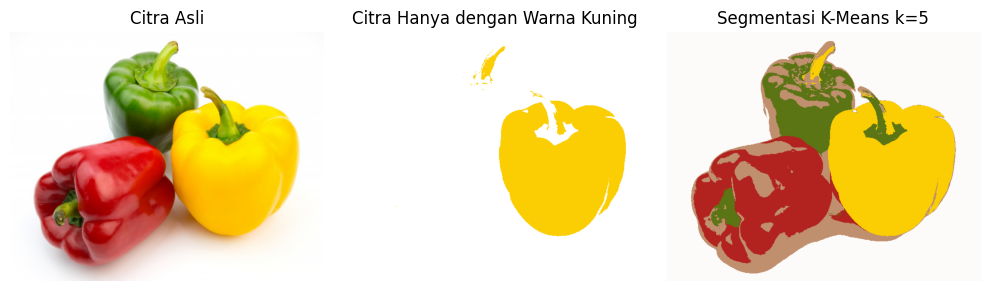

In [17]:
# Baca citra
image = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/peppers.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Ubah citra ke dalam bentuk array pixel
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# K-Means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5  # Jumlah cluster
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Ubah cluster menjadi warna
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_rgb.shape)

# Cari cluster yang mendekati warna kuning
# Definisikan rentang warna kuning dalam ruang RGB
lower_yellow = np.array([200, 200, 0], dtype="uint8")
upper_yellow = np.array([255, 255, 100], dtype="uint8")

# **Perubahan:** Loop melalui setiap center dan periksa apakah itu dalam rentang kuning
yellow_cluster_indices = []
for i, center in enumerate(centers):
    if (lower_yellow <= center).all() and (center <= upper_yellow).all():
        yellow_cluster_indices.append(i)

# Munculkan hanya warna kuning dari citra
output_image = np.copy(segmented_image)
# **Perubahan:** Reshape labels agar sesuai dengan dimensi output_image
labels_reshaped = labels.reshape(output_image.shape[:2])

for i in range(len(centers)):
    if i not in yellow_cluster_indices:  # Jika kluster bukan kuning
        # Gunakan labels_reshaped untuk indexing
        output_image[labels_reshaped == i] = [255, 255, 255]  # Set jadi putih

# Plot hasil segmentasi
plt.figure(figsize=(10, 5))

# Citra asli
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Citra Asli')
plt.axis('off')

# Citra dengan warna kuning yang dipertahankan
plt.subplot(1, 3, 2)
plt.imshow(output_image)
plt.title('Citra Hanya dengan Warna Kuning')
plt.axis('off')

# Plot hasil segmentasi
plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmentasi K-Means k=5')
plt.axis('off')

plt.tight_layout()
plt.show()

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini

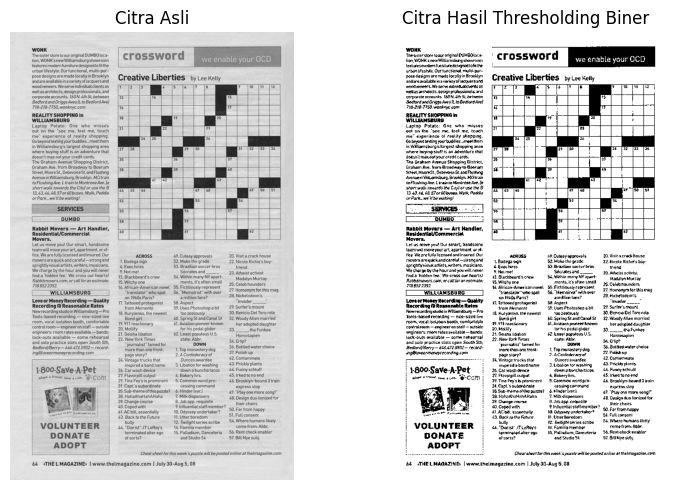

In [20]:
# 7 (Thresholding Biner Dengan Hasil Terbaik)
image = []
for i in range(2):
  image.append(cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/crossword.jpg', 0))

_, image[1] = cv.threshold(image[1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

title = ['Citra Asli', 'Citra Hasil Thresholding Biner']
# Create subplots with explicit removal of overlapping axes
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

for i in range(2):
    axes[i].imshow(image[i], cmap='gray')
    axes[i].set_title(title[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()